## Deep Learning and Neural Networks with KERAS

#### Subject: Concrete Strength Prediction
#### Project Owner:  Cameron Presley

### Overview

Build a regression model using the deep learning Keras library, experiment with increasing the number of training epochs and changing number of hidden layers, and examine how changing these parameters impacts the performance of the model.

#### Notebook Overview

<a href = #link1>1.   Import Libraries and Load the Data Set </a>
<a href = #link2>2.   Exploratory Data Analysis (EDA) and Insights </a>
<a href = #link3>3.   Data Cleaning & Pre-processing </a>
<a href = #link4>4.   Model Building </a>
<a href = #link5>5.   Analysis of Model Output and Performance </a>

### <a href = #link1>1.   Import Libraries and Load the Data Set

In [3]:
import tensorflow.keras


In [4]:
#Import libraries and avoid warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import math


import csv



### Load the Data Set

In [5]:
# data is located at :  https://cocl.us/concrete_data and downloaded locally

location = "/Users/cameronpresley/Data-Science-Projects/concrete_data.csv"

data = pd.read_csv (location)

df = data.copy()


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [8]:
df.shape

(1030, 9)

### Observations:

dataset is 9 columns, 1030 rows, no missing data, all .  Clean overall.  

### <a href = #link2>2.   Exploratory Data Analysis (EDA) and Insights </a>

#### Build a function to speed up numerical feature analysis

In [9]:
def histogram_boxplot(feature, figsize=(7,5), bins = None):
   
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows -> subplot grid= 2
                                           sharex = False, # shared x-axis on both plots
                                           gridspec_kw = {"height_ratios": (.5, .5)}, 
                                           figsize = figsize 
                                           ) # build 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='lime') # boxplot will show the mean value
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins,color = 'red') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='orange') # For histogram
    ax_hist2.axvline(np.mean(feature), color='red', linestyle='--') # Add mean to histogram to help with assessing skewness
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to histogram to help with assessing skewness

#### Univariate Analysis

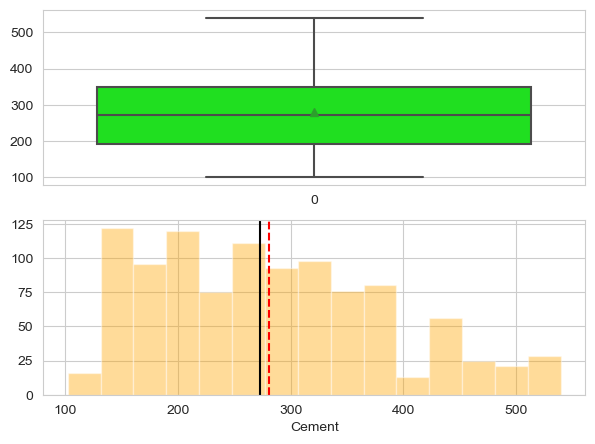

In [10]:
histogram_boxplot(df["Cement"])

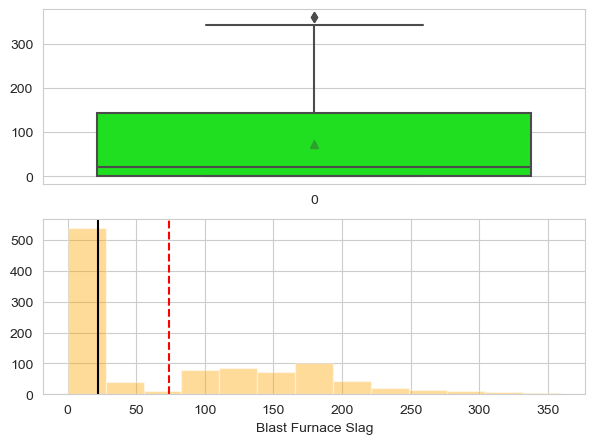

In [11]:
histogram_boxplot(df["Blast Furnace Slag"])

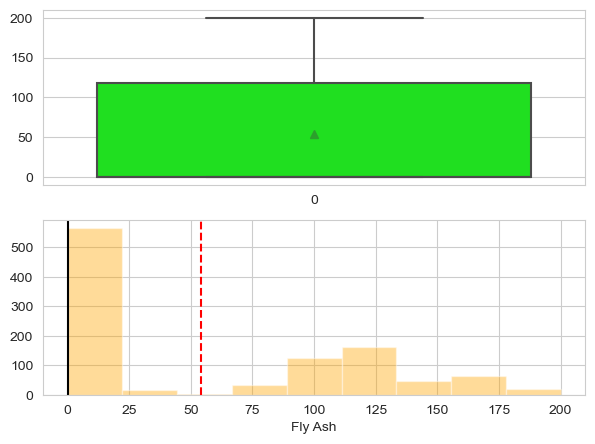

In [12]:
histogram_boxplot(df["Fly Ash"])

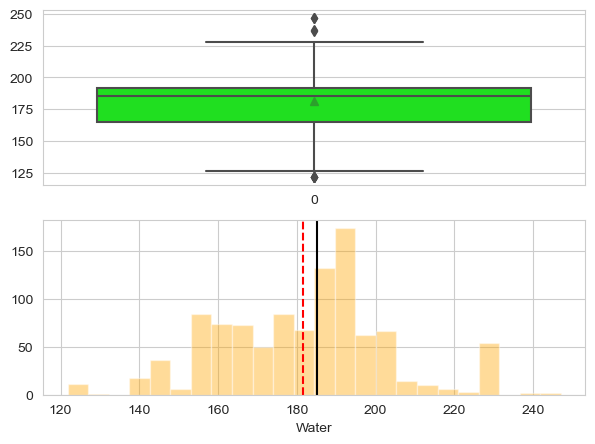

In [13]:
histogram_boxplot(df["Water"])

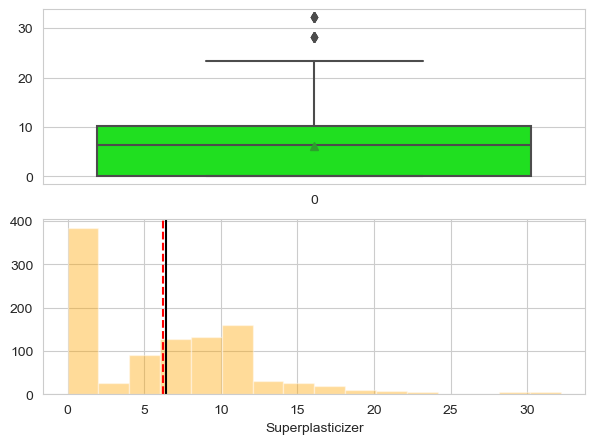

In [14]:
histogram_boxplot(df["Superplasticizer"])

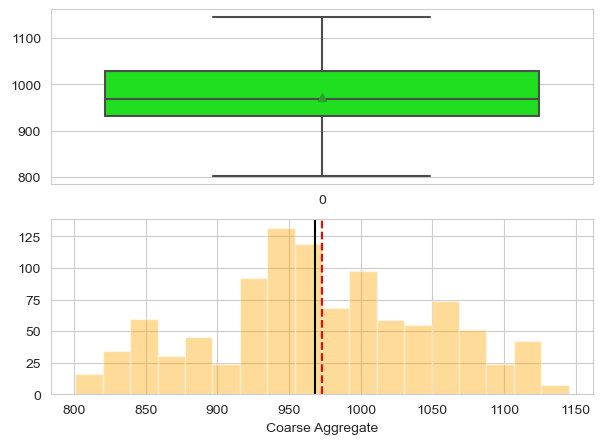

In [15]:
histogram_boxplot(df["Coarse Aggregate"])

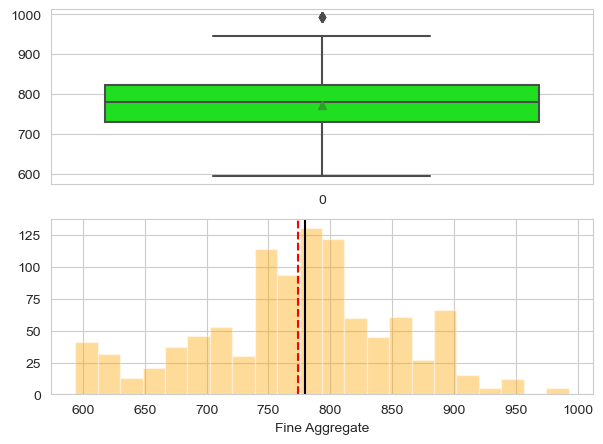

In [16]:
histogram_boxplot(df["Fine Aggregate"])

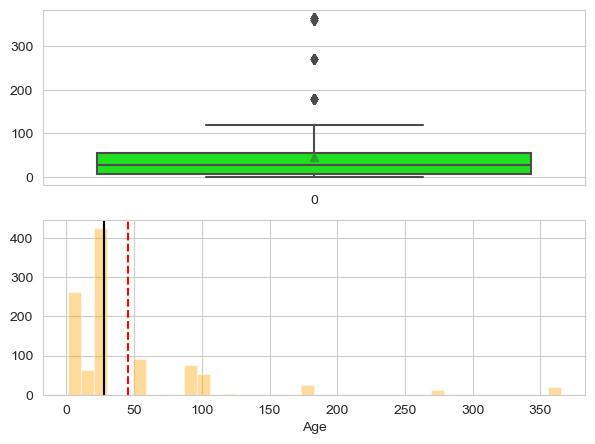

In [17]:
histogram_boxplot(df["Age"])

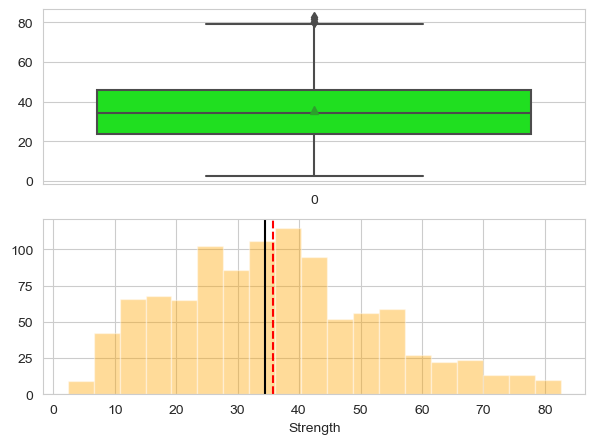

In [18]:
histogram_boxplot(df["Strength"])

#### Bivariate Analysis

In [19]:
all_col = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength']

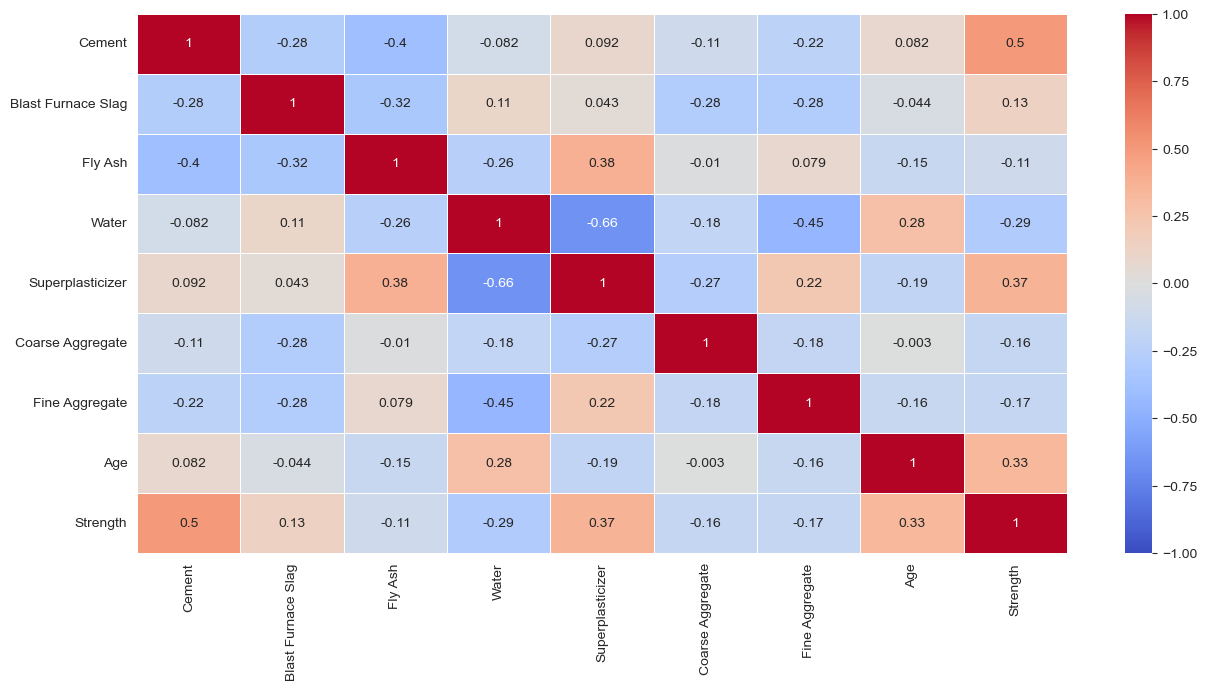

In [20]:
# Build correlation matrix

plt.figure(figsize=(15,7))

sns.heatmap(df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,
            cmap='coolwarm')

plt.show()

### <a href = #link3>3.   Data Cleaning & Pre-processing </a>

* Import libraries required to pre-process the data for model building
* Split data into Predictors and Targets.
* Split data into Train and Test Sets.
* Calculate Scaling Parameters from Training Data




In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Strength', axis = 1) # Drop the target variable, leaving only the Predictor Variables
y = df['Strength'] # Target Variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.3, random_state=99)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler using only the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform both the train and test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

### <a href = #link4>4.   Model Building </a>

In [22]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
n_cols = X_train.shape[1] # number of predictors
print ("Number of columns: ", n_cols)

Number of columns:  8


In [24]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics =['mse'])
    return model

In [25]:
# build the model
model = regression_model()

In [26]:
# fit the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=len(X), verbose=2, validation_split=0.3,);

Epoch 1/50
1/1 - 0s - loss: 1674.6202 - mse: 1674.6202 - val_loss: 1550.8816 - val_mse: 1550.8816 - 398ms/epoch - 398ms/step
Epoch 2/50
1/1 - 0s - loss: 1673.6060 - mse: 1673.6060 - val_loss: 1549.9514 - val_mse: 1549.9514 - 15ms/epoch - 15ms/step
Epoch 3/50
1/1 - 0s - loss: 1672.5927 - mse: 1672.5927 - val_loss: 1549.0231 - val_mse: 1549.0231 - 12ms/epoch - 12ms/step
Epoch 4/50
1/1 - 0s - loss: 1671.5814 - mse: 1671.5814 - val_loss: 1548.0980 - val_mse: 1548.0980 - 12ms/epoch - 12ms/step
Epoch 5/50
1/1 - 0s - loss: 1670.5730 - mse: 1670.5730 - val_loss: 1547.1744 - val_mse: 1547.1744 - 12ms/epoch - 12ms/step
Epoch 6/50
1/1 - 0s - loss: 1669.5670 - mse: 1669.5670 - val_loss: 1546.2505 - val_mse: 1546.2505 - 13ms/epoch - 13ms/step
Epoch 7/50
1/1 - 0s - loss: 1668.5619 - mse: 1668.5619 - val_loss: 1545.3278 - val_mse: 1545.3278 - 13ms/epoch - 13ms/step
Epoch 8/50
1/1 - 0s - loss: 1667.5576 - mse: 1667.5576 - val_loss: 1544.4071 - val_mse: 1544.4071 - 12ms/epoch - 12ms/step
Epoch 9/50
1/1

In [27]:
# convert the history.history dict to a pandas DataFrame:
# This will report the loss, mse, validation loss and mse
# need to convert this into a Dataframe to report out the list of MSEs 
hist_df = pd.DataFrame(history.history)

In [28]:
hist_df.head(100)

,loss,mse,val_loss,val_mse
0,1674.620239,1674.620239,1550.881592,1550.881592
1,1673.605957,1673.605957,1549.951416,1549.951416
2,1672.592651,1672.592651,1549.023071,1549.023071
3,1671.581421,1671.581421,1548.098022,1548.098022
4,1670.572998,1670.572998,1547.174438,1547.174438
5,1669.567017,1669.567017,1546.250488,1546.250488
6,1668.561890,1668.561890,1545.327759,1545.327759
7,1667.557617,1667.557617,1544.407104,1544.407104
8,1666.554810,1666.554810,1543.488770,1543.488770
9,1665.553467,1665.553467,1542.570557,1542.570557


In [29]:
# calculate the mean of the Mean Square Error
mean_mse = hist_df['mse'].mean()
print ("The Mean of the MSE is: ", mean_mse)

The Mean of the MSE is:  1650.4359692382814


In [30]:
# calculate the Standard Deviation of the Mean Square Error
std_dev_of_mse = hist_df['mse'].std()
print ("The Standard Deviaton of the MSE is: ", std_dev_of_mse)

The Standard Deviaton of the MSE is:  14.185488590869914


In [31]:
### END ####

